In [1]:
import textract
from tika import parser
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from textblob import TextBlob
#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from nameparser.parser import HumanName
from nltk import ne_chunk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import collections
import itertools
import pandas as pd
import networkx as nx

## Some text clearing

In [2]:
raw = parser.from_file("C:/Users/Michał/Magisterka_Semestr2/Analysis of Unstructured Data/List6/Harry Potter and The Sorcerer’s Stone.pdf")
text = raw['content']
text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) #removing hyperlinks
text = text.replace("Get free e-books and video tutorials at www.passuneb.com", '')
text = re.sub(r'(\r\n){2,}','\r\n', text)
text = re.sub('\n+', '\n', text) #removing white spaces
#text = re.sub(r'[^\w\s]','', text) #removing punctuaction

In [49]:
chapters = text.split("CHAPTER")
pages = text.split("Page")

## Characters mention per page

In [4]:
def get_human_names(text):
    person_list = []
    tokens = nltk.tokenize.word_tokenize(text)
    pos = nltk.pos_tag(tokens)
    sentt = nltk.ne_chunk(pos, binary = False)
    person_list = []
    person = []
    name = ""
    for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'):
        for leaf in subtree.leaves():
            person.append(leaf[0])
        if len(person) >= 1: #avoid grabbing lone surnames
            for part in person:
                name += part + ' '
            if name[:-1] not in person_list:
                person_list.append(name[:-1])
            name = ''
        person = []
    return person_list

In [5]:
pages[1]

' 1 of 226 \n \n \n Harry Potter and the Sorcerer’s Stone  \n  \nBy J.K. Rowling  \n  \n  \n  \nCHAPTER ONE  \n  \n  \nThe Boy Who Lived  \n  \n      Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly \nnormal, thank you very much. They were the last people you’d expect to be involved in anything \nstrange or mysterious, because they just didn’t hold with such nonsense.  \n  \n      Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy \nman with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin \nand blonde and had nearly twice the usual amount of neck, which came in very useful as she \nspent so much of her time craning over garden fences, spying on the neighbors. The Dursleys \nhad a small son called Dudley and in their opinion there was no finer boy anywhere.  \n  \n      The Dursleys had everything they wanted, but they also had a secret, and their greatest fear w

In [6]:
pages_dict = {}

In [7]:
for i in range(len(pages)):
    pages_dict[i] = get_human_names(pages[i])

In [ ]:
pages_dict

In [9]:
actual_names = ['Harry Potter', 'Petunia Dursley', 'Mr. Dursley', 'Dudley', 'Quirinus Quirrell', 'Professor McGonagall', 'Albus Dumbledore',
               'Lord Voldemort', 'Madam Pomfrey', 'Lily', 'James', 'Rubeus Hagrid', 'Neville Longbottom', 'Severus Snape', 'Draco Malfoy',
               'Ron Weasley', 'Hermione Granger', 'Vernon Dursley', 'Aunt Petunia', 'Ginny', 'Fred', 'George', 'Percy',
               'Nicolas Flamel', 'Norbert', 'Jim McGuffin', 'Sirius Black','Arabella Figg', 'Tibbles', 'Snowy', 'Mr Paws',
               'Tufty', 'Yvonne', 'Piers Polkiss', 'Dennis', 'Malcolm', 'Gordon', 'Evans', 'Cornelius Fudge', 'Miranda Goshawk',
               'Bathilda Bagshot', 'Adalbert Waffling', 'Emeric Switch', 'Garrick Ollivander', 'Narcissa', 'Lucius', 'Phyllida Spore',
               'Arsenus Jigger', 'Newton Scamander', 'Quentin Trimble', 'Lee Jordan', 'Bill', 'Charlie', 'Peter Pettigrew',
               'Susan Bones', 'Lawander Brown', 'Seamus Finnigan', 'Millicent Bulstrode', 'Justin Finch-Fletchley', 'Parvati Patil',
               'Padma', 'Adrian Pucey', 'Miles Bletchley', 'Katie Bell', "Marcus Flint", 'Alicia Spinnet', 'Angelina Johnson',
               'Oliver Wood', 'Filius Flitwick', 'Argus Filch', 'Howard','Uncle Vernon']

In [10]:
char_dict = {k: [] for k in range(len(pages_dict))}
for i in range(len(actual_names)):
    x = actual_names[i].find(' ')
    for j in range(len(pages_dict)):        
        if x == -1:
            if actual_names[i] in pages_dict[j]:
                char_dict[j].append(actual_names[i])
            else:
                pass
        else:
            if actual_names[i][0:x] in pages_dict[j] or actual_names[i][x+1:] in pages_dict[j] or actual_names[i] in pages_dict[j]:
                char_dict[j].append(actual_names[i])
            else:
                pass

In [11]:
char_dict

{0: [],
 1: ['Harry Potter',
  'Petunia Dursley',
  'Mr. Dursley',
  'Dudley',
  'Vernon Dursley'],
 2: ['Harry Potter', 'Mr. Dursley'],
 3: ['Harry Potter',
  'Petunia Dursley',
  'Mr. Dursley',
  'Dudley',
  'Vernon Dursley'],
 4: ['Petunia Dursley',
  'Mr. Dursley',
  'Dudley',
  'Vernon Dursley',
  'Jim McGuffin',
  'Howard'],
 5: ['Harry Potter',
  'Petunia Dursley',
  'Mr. Dursley',
  'Albus Dumbledore',
  'Vernon Dursley',
  'Aunt Petunia'],
 6: ['Professor McGonagall', 'Albus Dumbledore'],
 7: ['Professor McGonagall',
  'Albus Dumbledore',
  'Lord Voldemort',
  'Madam Pomfrey'],
 8: ['Harry Potter',
  'Professor McGonagall',
  'Albus Dumbledore',
  'Lord Voldemort',
  'Lily',
  'Rubeus Hagrid'],
 9: ['Harry Potter',
  'Professor McGonagall',
  'Albus Dumbledore',
  'Rubeus Hagrid'],
 10: ['Harry Potter',
  'Professor McGonagall',
  'Albus Dumbledore',
  'James',
  'Rubeus Hagrid',
  'Sirius Black'],
 11: ['Harry Potter',
  'Petunia Dursley',
  'Mr. Dursley',
  'Professor McGona

In [12]:
autorzy_lista = [i for i in char_dict.values()]

In [13]:
authors_joined = sum(autorzy_lista, [])
nodes_list = list(set(authors_joined))
nodes_size = []
links = []
for i in autorzy_lista:
    link = itertools.combinations(i, 2)
    link_help = [list(i) for i in link]
    links.append(link_help)

links = sum(links, [])
links_without_duplicates = list(set(map(lambda i: tuple(sorted(i)), links)))
aut = []
num = []
for i in nodes_list:
    size = authors_joined.count(i)
    nodes_size.append([i,size])
    aut.append(i)
    num.append(size)

In [14]:
nodes_size
nodes_size2 = [[i[0],i[1]+5] for i in nodes_size]

In [15]:
links_sorted = []
for i in links:
    links_sorted.append(tuple(sorted(i)))

In [16]:
link_weights = []
for link in links_without_duplicates:
    link_weights.append([link, links_sorted.count(link)])

In [17]:
link_dict = dict(link_weights)
size_dict = dict(nodes_size)
size_dict2 = dict(nodes_size2)

In [18]:
source1 = []
target1 = []
weight1 = []
for i in link_weights:
    source1.append(i[0][0])
    target1.append(i[0][1])
    weight1.append(i[1])

In [19]:
links_sorted
cooperations = []
authors_coop =[]
for i in links_without_duplicates:
    cooperations.append(links_sorted.count(tuple(i)))
    authors_coop.append(i)

In [20]:
df_cooperations = pd.DataFrame(list(zip(authors_coop,cooperations)), columns = ['Authors','Number of cooperations'])
df_cooperations = df_cooperations.sort_values(by = 'Number of cooperations', ascending = False)
df_coop_limit = df_cooperations.head(20)

In [21]:
weighted_edges = []
for i in authors_coop:
    weighted_edges.append(list(i))
for j in range(len(cooperations)):
    weighted_edges[j].append(cooperations[j])

In [22]:
df = pd.DataFrame(list(zip(source1, target1, weight1)), columns = ['Source','Target','Weight'])

In [53]:
G = nx.from_pandas_edgelist(df, 'Source', 'Target', 'Weight')
single = []
for i in autorzy_lista:
    for j in i:
        if j not in G.nodes():
            single.append(j)
G.add_nodes_from(single)
G.add_weighted_edges_from(weighted_edges)
common_events = dict([((i[0], i[1]), i[2]) for i in weighted_edges])
nx.set_edge_attributes(G, name='common_events', values=common_events)

In [54]:
adjusted_node_size2 = size_dict2
nx.set_node_attributes(G, name='adjusted_node_size2', values=adjusted_node_size2)

In [55]:
adjusted_node_size = size_dict
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [56]:

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size2'
size2 = 'adjusted_node_size2'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Reds8

#Choose a title!
title = 'Research Data Analysis'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character Name", "@index"),
        ("Number of pages it appeared on", "@adjusted_node_size"),]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
              plot_width=1800, plot_height=850,
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, nx.spring_layout, scale=20, center=(0, 0))

#Set node sizes and colors
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size2, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))
#Set edge highlight colors
node_highlight_color = 'white'
edge_highlight_color = 'black'
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()
plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source_node = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels_node = LabelSet(x='x', y='y', text='name', source=source_node, background_fill_color='white', text_font_size='11px', background_fill_alpha=.7)

source = network_graph.edge_renderer.data_source
source.data['names'] = list(df['Weight'])


node_hover_tool = HoverTool(renderers=[network_graph.node_renderer],
                            tooltips=[
       ("Character Name", "@index"),
        ("Number of pages it appeared on", "@adjusted_node_size"),]
                            ,line_policy="interp")

edge_hover_tool = HoverTool(renderers=[network_graph.edge_renderer],
    tooltips=[("common_events", "@common_events")],

                            line_policy="interp")

code = """
    var result = new Float64Array(xs.length)
    coords = provider.get_edge_coordinates(source)[%s]
    for (var i = 0; i < xs.length; i++) {
        result[i] = (coords[i][0] + coords[i][1])/2
    }
    return result
"""

xcoord = CustomJSTransform(v_func=code % "0", args=dict(provider=network_graph.layout_provider, source=source))
ycoord = CustomJSTransform(v_func=code % "1", args=dict(provider=network_graph.layout_provider, source=source))

# Use the transforms to supply coords to a LabelSet
labels = LabelSet(x=transform('start', xcoord),
                  y=transform('start', ycoord),
                  text='names', text_font_size="10px",
                  x_offset=5, y_offset=5,
                  source=source, background_fill_alpha=.7)


plot.renderers.append(labels)
plot.renderers.append(labels_node)


plot.add_tools(node_hover_tool, edge_hover_tool)

show(plot)

## Top 20 keywords

In [41]:
authors_joined = sum(autorzy_lista, [])
nodes_list = list(set(authors_joined))
nodes_size = []
links = []
for i in autorzy_lista:
    link = itertools.combinations(i, 2)
    link_help = [list(i) for i in link]
    links.append(link_help)

links = sum(links, [])
links_without_duplicates = list(set(map(lambda i: tuple(sorted(i)), links)))
aut = []
num = []
for i in nodes_list:
    size = authors_joined.count(i)
    nodes_size.append([i,size])
    aut.append(i)
    num.append(size)


In [42]:
all_words = word_tokenize(text)
stopwords = nltk.corpus.stopwords.words("english")
words_with_meaning1 = [w for w in all_words if w.lower() not in stopwords] #without stopwords
no_punc = re.sub(r'[^\w\s]','', ' '.join(words_with_meaning1))
words_with_meaning2 = word_tokenize(no_punc)
words_with_meaning = [x for x in words_with_meaning2 if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())] #without integers
nouns = [word for word, pos in nltk.pos_tag(words_with_meaning) if(pos[:2] == 'NN')] #only nouns JJ for adjectives
nouns = list(filter(lambda a: a != 'Page', nouns))
frequency = FreqDist(nouns)
freqdict = dict(frequency)
sort_orders = sorted(freqdict.items(), key=lambda x: x[1], reverse=True)
raw_text = ' '.join(nouns)

In [43]:
sort_orders

[('Harry', 1325),
 ('Ron', 427),
 ('Hagrid', 369),
 ('Hermione', 269),
 ('Professor', 179),
 ('Snape', 170),
 ('Dumbledore', 155),
 ('Dudley', 139),
 ('Malfoy', 127),
 ('something', 121),
 ('time', 118),
 ('Neville', 117),
 ('Vernon', 116),
 ('Quirrell', 113),
 ('Uncle', 111),
 ('eyes', 101),
 ('Potter', 100),
 ('McGonagall', 100),
 ('way', 93),
 ('room', 89),
 ('people', 87),
 ('door', 87),
 ('head', 86),
 ('face', 85),
 ('Gryffindor', 82),
 ('Mr', 80),
 ('house', 74),
 ('anything', 70),
 ('Hogwarts', 69),
 ('hand', 67),
 ('look', 65),
 ('school', 65),
 ('day', 59),
 ('Oh', 59),
 ('Quidditch', 58),
 ('Petunia', 57),
 ('Stone', 56),
 ('voice', 56),
 ('boy', 55),
 ('Wood', 55),
 ('Dursley', 54),
 ('Filch', 54),
 ('feet', 52),
 ('ter', 52),
 ('Aunt', 52),
 ('things', 51),
 ('years', 50),
 ('cloak', 50),
 ('bit', 50),
 ('yeh', 50),
 ('Dursleys', 49),
 ('thing', 49),
 ('Slytherin', 49),
 ('floor', 48),
 ('night', 48),
 ('Well', 48),
 ('air', 47),
 ('moment', 47),
 ('wand', 47),
 ('Weasley'

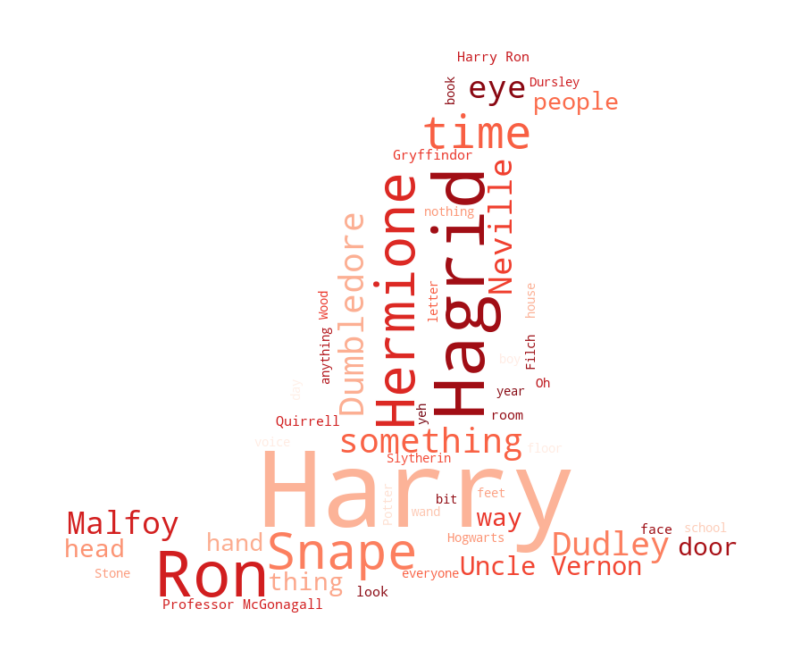

In [44]:
mask = np.array(Image.open("C:/Users/Michał/Magisterka_Semestr2/Analysis of Unstructured Data/List6/sorting_hat.png"))
wordcloud = WordCloud(width = 1500, height = 1300,colormap="Reds", max_font_size = 119,background_color="white", max_words=50, mask=mask).generate(raw_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.gcf().set_size_inches(16, 12)
plt.show()

## Sentiment of every chapter

In [45]:
polarity = {}
for i in range(len(chapters)):
    polarity[i] = TextBlob(chapters[i]).polarity
del polarity[0]

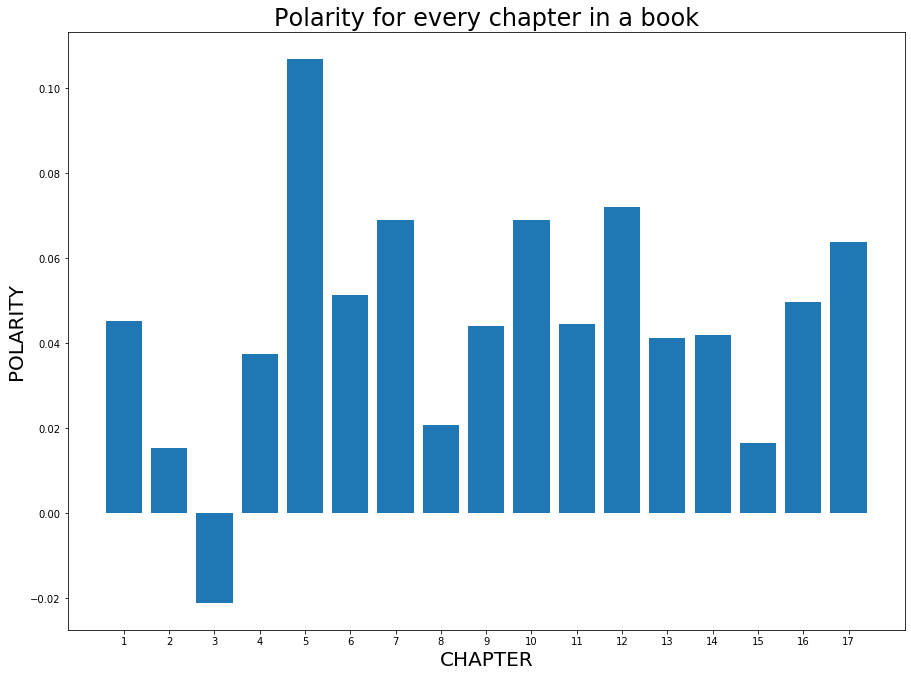

In [46]:
chapt = list(polarity.keys())
values = list(polarity.values())
plt.bar(range(len(polarity)), values, tick_label=chapt)
plt.xlabel('CHAPTER', fontsize = 20)
plt.ylabel('POLARITY', fontsize = 20)
plt.title('Polarity for every chapter in a book', fontsize = 24)
plt.gcf().set_size_inches(15, 11)
plt.show()

In [50]:
sia = SentimentIntensityAnalyzer()
negative_b = []
positive_b = []
neutral_b = []
negative_comment_b = []
positive_comment_b = []
neutral_comment_b = []
for i in range(len(chapters)):
    sentiment = sia.polarity_scores(chapters[i]) 
    negative_b.append(sentiment['neg'])
    positive_b.append(sentiment['pos'])
    neutral_b.append(sentiment['neu'])
    if sentiment['neg']>0:
        negative_comment_b.append(i)
    if sentiment['pos']>0:
        positive_comment_b.append(i)
    if sentiment['neu']>0:
        neutral_comment_b.append(i)
del negative_b[0]
del positive_b[0]
del neutral_b[0]

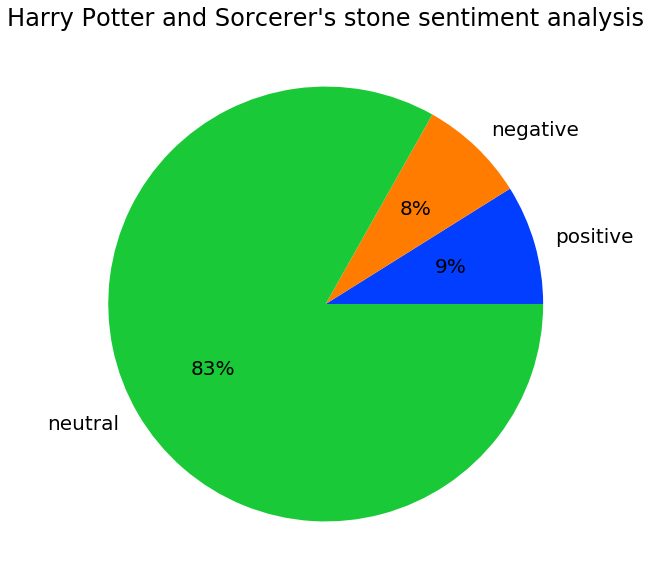

In [51]:
plt.figure()
sentiment_result_b = [np.sum(positive_b), np.sum(negative_b), np.sum(neutral_b)]
labels = ['positive', 'negative', 'neutral']

colors = sns.color_palette('bright')[0:3]
plt.gcf().set_size_inches(16, 10)
plt.pie(sentiment_result_b, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 20})
plt.title("Harry Potter and Sorcerer's stone sentiment analysis", fontsize=24)
plt.show()